# Steady State Baseline: Developing Country (Brazil)
Differences between formal and informal sector:
- Unemployment probability: higher than in formal (10% vs 5%)
- Unemployment Insurance: 70% in formal, 0 in informal
- Wage rate wedge of 20%


In [1]:
from TwoSectorModel_HANK import TwoSectorMarkovConsumerType
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
### Define shared parameters
Rfree_f = 0.03
Rfree_i = 0.03
PermShkStd_f = 0.06
PermShkStd_i = 0.06
TranShkStd_f = 0.2
TranShkStd_i = 0.2
PermGroFac_f = 1.0
PermGroFac_i = 1.0
UnempPrb_f = 0.05
UnempPrb_i = 0.10
IncUnemp_f = 0.7
IncUnemp_i = 0.0
taxrate_f = 0.0
taxrate_i = 0.0
labor_f = 0.8 #1.0
labor_i = 0.8 #1.0
wage_f = 1.0
wage_i = 0.8
BoroCnstArt_f = 0.0
BoroCnstArt_i = 0.0
LivPrb_f = .99375
LivPrb_i = .99375

cycles = 0
T_cycle = 1

In [3]:
# Define the Markov transition matrix for sector f(ormal) to i(nformal)
p_f_to_i = 0.2
p_i_to_f = 0.2
p_f_to_f = 1 - p_f_to_i
p_i_to_i = 1 - p_i_to_f

MrkvArray = np.array(
    [
        [
            p_f_to_f
        ,
            p_f_to_i
        ],
        [
           p_i_to_f
        ,
            p_i_to_i
        ]
    ]
)

NSectors = 2

Formal_Size = 0.5

In [4]:
### Dictionary to be passed to the consumer type
HANK_Dict_TwoSector = {
    "cycles": cycles,
    "T_cycle": T_cycle,
    # Parameters shared with the perfect foresight model
    "Rfree": [np.array([1.0 + Rfree_f, 1.0 + Rfree_i])],                    # Interest factor on assets
    "LivPrb" : [np.array([LivPrb_f, LivPrb_i])],                   # Survival probability

    # Parameters that specify the income distribution over the lifecycle
    "PermShkStd" : [np.array([PermShkStd_f, PermShkStd_i])],                  # Standard deviation of log permanent shocks to income
    "PermShkCount" : 5,                    # Number of points in discrete approximation to permanent income shocks
    "TranShkStd" : [np.array([TranShkStd_f, TranShkStd_i])],                  # Standard deviation of log transitory shocks to income
    "TranShkCount" : 5,    
    "PermGroFac": [np.array([PermGroFac_f, PermGroFac_i])],                  # Permanent income growth factor

    # HANK params
    "taxrate" : [np.array([taxrate_f, taxrate_i])], # set to 0.0 because we are going to assume that labor here is actually after tax income
    "labor": [np.array([labor_f, labor_i])],
    "wage": [np.array([wage_f, wage_i])],    
    
    # Number of points in discrete approximation to transitory income shocks
    "UnempPrb" : [np.array([UnempPrb_f, UnempPrb_i])],                      # Probability of unemployment while working
    "IncUnemp" :  [np.array([IncUnemp_f, IncUnemp_i])],                     # Unemployment benefits replacement rate
  
    # Parameters for constructing the "assets above minimum" grid
    "aXtraMax" : 500,                      # Maximum end-of-period "assets above minimum" value
    "aXtraCount" : 100,                     # Number of points in the base grid of "assets above minimum"
    "BoroCnstArt": [BoroCnstArt_f, BoroCnstArt_i],
    
    # Transition Matrix simulation parameters
    "mCount": 200,
    "mMax": 500,
    "mMin": 1e-5,
    "mFac": 3,

    # Hank model bool
    "HANK":True,     

    ### Markov Parameters
    "MrkvArray": [MrkvArray],  # Transition Matrix for Markov Process
    "global_markov": False,  # If True, then the Markov Process is the same for all agents
    "MrkvPrbsInit": [Formal_Size, 1 - Formal_Size],
}

# to add taxes, labor, and wage. This ensures that we can shock each variable.
def function(taxrate, labor, wage):
    
    z = (1- taxrate)*labor*wage
    return z

HANK_Dict_TwoSector['TranShkMean_Func'] = [function]

In [5]:
T = 300

## Define Agents and create Steady State Values

In [6]:
Agent_TwoSector_Baseline = TwoSectorMarkovConsumerType(**HANK_Dict_TwoSector)
Agent_TwoSector_Baseline.solve()


c:\Users\adria\anaconda3\envs\Durable\lib\site-packages\HARK\interpolation.py:2187: RuntimeWarning: All-NaN slice encountered
  y = self.compare(fx, axis=1)


In [7]:
A_SS_TwoSector_Baseline, C_SS_TwoSector_Baseline, A_SS_Mrkv_TwoSector_Baseline, C_SS_Mrkv_TwoSector_Baseline = Agent_TwoSector_Baseline.compute_steady_state()
MPC_TwoSector_Baseline = Agent_TwoSector_Baseline.calc_jacobian('labor',0, T)[0][0][0]

c:\Users\adria\anaconda3\envs\Durable\lib\site-packages\HARK\interpolation.py:2187: RuntimeWarning: All-NaN slice encountered
  y = self.compare(fx, axis=1)


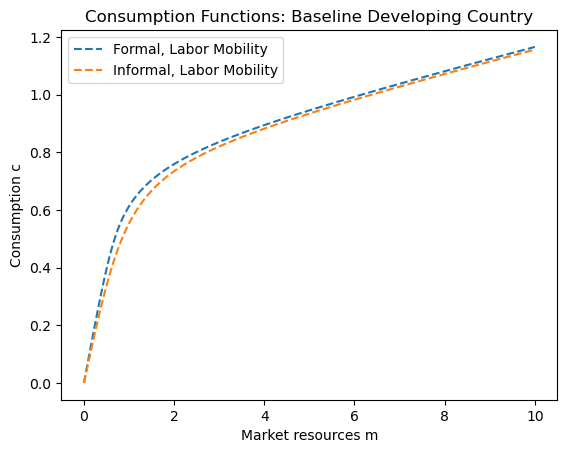

In [8]:
### Compare consumption functions
mGrid = np.linspace(0, 10, 1000)
plt.plot(mGrid, Agent_TwoSector_Baseline.solution[0].cFunc[0](mGrid), '--', label='Formal, Labor Mobility')
plt.plot(mGrid, Agent_TwoSector_Baseline.solution[0].cFunc[1](mGrid), '--', label='Informal, Labor Mobility')
plt.xlabel('Market resources m')
plt.ylabel('Consumption c')
plt.legend()
plt.title('Consumption Functions: Baseline Developing Country')
plt.show()

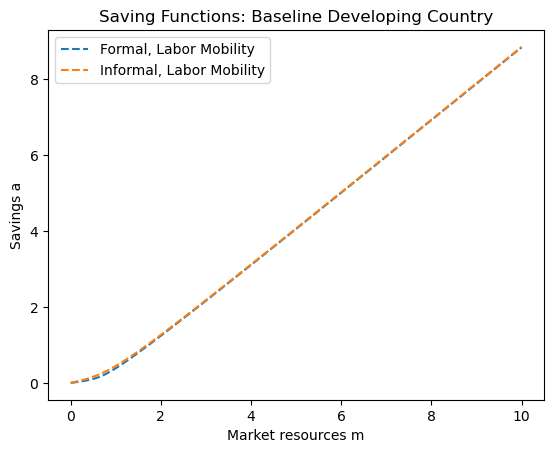

In [9]:
plt.plot(mGrid, mGrid - Agent_TwoSector_Baseline.solution[0].cFunc[0](mGrid), '--', label='Formal, Labor Mobility')
plt.plot(mGrid, mGrid - Agent_TwoSector_Baseline.solution[0].cFunc[1](mGrid), '--', label='Informal, Labor Mobility')
plt.xlabel('Market resources m')
plt.ylabel('Savings a')
plt.legend()
plt.title('Saving Functions: Baseline Developing Country')
# plt.savefig('../../figures/Saving_Functions_Baseline.png')
plt.show()

In [10]:
## Compare Steady States
print('Steady States:')
print('With Mobility: Formal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Mrkv_TwoSector_Baseline[0], A_SS_Mrkv_TwoSector_Baseline[0]))
print('With Mobility: Informal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Mrkv_TwoSector_Baseline[1], A_SS_Mrkv_TwoSector_Baseline[1]))
print('With Mobility: Total: Consumption {:.3f} Assets {:.3f}'.format(C_SS_TwoSector_Baseline, A_SS_TwoSector_Baseline))

## Compare MPCs
print('MPCs:')
print('With Mobility: Total: {:.3f}'.format(MPC_TwoSector_Baseline))

Steady States:
With Mobility: Formal Sector: Consumption 0.786 Assets 1.629
With Mobility: Informal Sector: Consumption 0.728 Assets 1.394
With Mobility: Total: Consumption 0.757 Assets 1.511
MPCs:
With Mobility: Total: 0.090


In [11]:
CJACZ, AJACZ = Agent_TwoSector_Baseline.calc_jacobian('labor',0, T)
CJACR, AJACR = Agent_TwoSector_Baseline.calc_jacobian('Rfree',0, T)

In [12]:
CJACZ_f, AJACZ_f = Agent_TwoSector_Baseline.calc_jacobian('labor',1, T)
CJACR_f, AJACR_f = Agent_TwoSector_Baseline.calc_jacobian('Rfree',1, T)

In [13]:
CJACZ_i, AJACZ_i = Agent_TwoSector_Baseline.calc_jacobian('labor',2, T)
CJACR_i, AJACR_i = Agent_TwoSector_Baseline.calc_jacobian('Rfree',2, T)

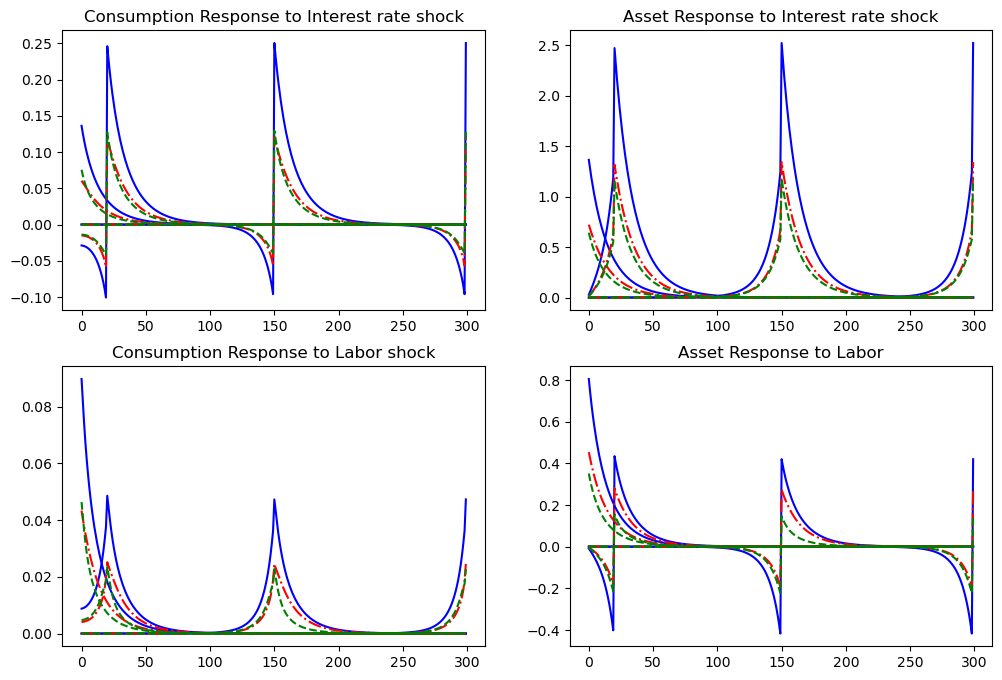

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Consumption Response to Interest rate shock
axs[0, 0].plot(CJACR.T[0], color = 'blue')
axs[0, 0].plot(CJACR.T[20], color = 'blue')
axs[0, 0].plot(CJACR.T[150], color = 'blue')
axs[0, 0].plot(CJACR.T[-1], color = 'blue')
axs[0, 0].plot(CJACR_f.T[0], '-.', color = 'red', label = 'formal')
axs[0, 0].plot(CJACR_f.T[20], '-.', color = 'red', label = 'formal')
axs[0, 0].plot(CJACR_f.T[150], '-.', color = 'red', label = 'formal')
axs[0, 0].plot(CJACR_f.T[-1], '-.', color = 'red', label = 'formal')
axs[0, 0].plot(CJACR_i.T[0], '--', color = 'green', label = 'informal')
axs[0, 0].plot(CJACR_i.T[20], '--', color = 'green', label = 'informal')
axs[0, 0].plot(CJACR_i.T[150], '--', color = 'green', label = 'informal')
axs[0, 0].plot(CJACR_i.T[-1], '--', color = 'green', label = 'informal')
axs[0, 0].set_title("Consumption Response to Interest rate shock")

# Asset Response to Interest rate shock
axs[0, 1].plot(AJACR.T[0], color = 'blue')
axs[0, 1].plot(AJACR.T[20], color = 'blue')
axs[0, 1].plot(AJACR.T[150], color = 'blue')
axs[0, 1].plot(AJACR.T[-1], color = 'blue')
axs[0, 1].plot(AJACR_f.T[0], '-.', color = 'red', label = 'formal')
axs[0, 1].plot(AJACR_f.T[20], '-.', color = 'red', label = 'formal')
axs[0, 1].plot(AJACR_f.T[150], '-.', color = 'red', label = 'formal')
axs[0, 1].plot(AJACR_f.T[-1], '-.', color = 'red', label = 'formal')
axs[0, 1].plot(AJACR_i.T[0], '--', color = 'green', label = 'informal')
axs[0, 1].plot(AJACR_i.T[20], '--', color = 'green', label = 'informal')
axs[0, 1].plot(AJACR_i.T[150], '--', color = 'green', label = 'informal')
axs[0, 1].plot(AJACR_i.T[-1], '--', color = 'green', label = 'informal')
axs[0, 1].set_title("Asset Response to Interest rate shock")

# Consumption Response to Labor shock
axs[1, 0].plot(CJACZ.T[0], color = 'blue')
axs[1, 0].plot(CJACZ.T[20], color = 'blue')
axs[1, 0].plot(CJACZ.T[150], color = 'blue')
axs[1, 0].plot(CJACZ.T[-1], color = 'blue')
axs[1, 0].plot(CJACZ_f.T[0], '-.', color = 'red', label = 'formal')
axs[1, 0].plot(CJACZ_f.T[20], '-.', color = 'red', label = 'formal')
axs[1, 0].plot(CJACZ_f.T[150], '-.', color = 'red', label = 'formal')
axs[1, 0].plot(CJACZ_f.T[-1], '-.', color = 'red', label = 'formal')
axs[1, 0].plot(CJACZ_i.T[0], '--', color = 'green', label = 'informal')
axs[1, 0].plot(CJACZ_i.T[20], '--', color = 'green', label = 'informal')
axs[1, 0].plot(CJACZ_i.T[150], '--', color = 'green', label = 'informal')
axs[1, 0].plot(CJACZ_i.T[-1], '--', color = 'green', label = 'informal')
axs[1, 0].set_title("Consumption Response to Labor shock")

# Asset Response to Labor
axs[1, 1].plot(AJACZ.T[0], color = 'blue')
axs[1, 1].plot(AJACZ.T[20], color = 'blue')
axs[1, 1].plot(AJACZ.T[150], color = 'blue')
axs[1, 1].plot(AJACZ.T[-1], color = 'blue')
axs[1, 1].plot(AJACZ_f.T[0], '-.', color = 'red', label = 'formal')
axs[1, 1].plot(AJACZ_f.T[20], '-.', color = 'red', label = 'formal')
axs[1, 1].plot(AJACZ_f.T[150], '-.', color = 'red', label = 'formal')
axs[1, 1].plot(AJACZ_f.T[-1], '-.', color = 'red', label = 'formal')
axs[1, 1].plot(AJACZ_i.T[0], '--', color = 'green', label = 'informal')
axs[1, 1].plot(AJACZ_i.T[20], '--', color = 'green', label = 'informal')
axs[1, 1].plot(AJACZ_i.T[150], '--', color = 'green', label = 'informal')
axs[1, 1].plot(AJACZ_i.T[-1], '--', color = 'green', label = 'informal')
axs[1, 1].set_title("Asset Response to Labor")

plt.show()